
<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

**Laboratorio N°2**

---


######**Redes Neuronales Convolucionales (CNN) - Funcionalidades**

Modelo de DL para reconocer una imagen (Recuperada desde imagen) en al menos 10 clases (Solo backend COLAB) Indicando como se amplia el numero de clases.


***Caso de Uso: NN_Cifar100_con_10_clases***

Integrantes:

- [G101] Felipe Antonio Perez

- [G102] Karina Grissel Sánchez

- [G103] Ismael Rubén Jara

- [G104] Juan Pablo González



# **ALCANCES:**

- Esta red neuronal densa convolucional se orienta a clasificar 10 elementos, considerando como base el Dataset *Cifar100*, la cual la filtra en 10 clases. 
- La solución informática debe contemplar un solo un back-end (Colab-Python), donde se conbsidera un modelo propio y modelo pre entrenados. 
- El proceso considera la aplicación de ánalisis exploratorios y de optimización, como Fine-Tunning y Data Augmentation.

## 0. Revisar existencia de GPU con capacidad CUDA

El comando !nvidia-smi es una herramienta de línea de comandos proporcionada por Nvidia que se utiliza para monitorear y administrar las GPU de Nvidia instaladas en un sistema. Este comando proporciona información sobre la configuración de la GPU, su uso actual, la temperatura y otros detalles de diagnóstico.

In [ ]:
!nvidia-smi

Mon May  8 00:58:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1. Import de librerias

Este código importa todos los módulos necesarios para construir, entrenar y evaluar un modelo de red neuronal convolucional para clasificación de imágenes utilizando el conjunto de datos CIFAR-100.

- tensorflow es el marco de trabajo de aprendizaje automático utilizado en este código.
- io es un módulo de Python utilizado para trabajar con flujos de entrada/salida de datos.


- cifar100 es un conjunto de datos de imágenes preprocesadas utilizado en el entrenamiento y la evaluación del modelo.
- Sequential es una clase de Keras que se utiliza para construir modelos de red neuronal secuenciales.
- Dense, Flatten, Conv2D, MaxPooling2D, Activation, y Dropout son capas de red neuronal utilizadas en la construcción del modelo.
- categorical_crossentropy es una función de pérdida utilizada para el entrenamiento del modelo.
- Adam es un algoritmo de optimización utilizado para ajustar los pesos de la red neuronal durante el entrenamiento.
- to_categorical es una función que se utiliza para convertir las etiquetas de clasificación en una representación categórica.
- Callback y EarlyStopping son clases de Keras utilizadas para personalizar el entrenamiento del modelo.
- ImageDataGenerator es una clase de Keras utilizada para aumentar los datos de entrenamiento mediante la generación de imágenes transformadas.
- DenseNet121 es una red neuronal convolucional preentrenada que se utilizará en el modelo como base.
- matplotlib es una biblioteca de visualización de datos utilizada para graficar los resultados del modelo.
- numpy es una biblioteca de Python utilizada para realizar operaciones matemáticas.

In [ ]:
import tensorflow as tf
import io

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## 2. Carga de dataset

Este código carga el conjunto de datos CIFAR-100 utilizando la función load_data del módulo cifar100 de Keras. La función load_data carga y devuelve el conjunto de datos dividido en datos de entrenamiento y datos de prueba, cada uno con una matriz de imágenes y un vector de etiquetas.

In [ ]:
#Cargando dataset utilizando CIFAR10

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 2s 0us/step


## 3. Preparacion de datos (Normalizar)

Este código prepara los datos de entrada y salida para el modelo de red neuronal convolucional que se construirá y entrenará en el siguiente código.

- classes_of_interest es una lista de las clases que se utilizarán en el modelo (en este caso, las 10 primeras clases de CIFAR-100).
- train_idxs y test_idxs son listas de índices correspondientes a las imágenes y etiquetas de entrenamiento y prueba que corresponden a las clases de interés especificadas en classes_of_interest.
- x_train, y_train, x_test, y y_test se actualizan para contener solo los datos de entrenamiento y prueba que corresponden a las clases de interés.
nb_classes se establece en el número de clases de interés (10).
- Las matrices de imágenes se normalizan dividiéndolas por 255, lo que las transforma en valores de punto flotante entre 0 y 1. Las etiquetas se convierten en una matriz categórica utilizando la función to_categorical.
- Se define un objeto datagen de la clase ImageDataGenerator para realizar el aumento de datos en el conjunto de datos de entrenamiento. El aumento de datos se refiere a la generación de nuevas imágenes a partir de las imágenes existentes, aplicando transformaciones como rotación, cambio de tamaño, cambio de posición y espejado.

In [ ]:
#Prepararar las variables de entrada y salida.

classes_of_interest = range(10)
train_idxs = [i for i, label in enumerate(y_train) if label in classes_of_interest]
test_idxs = [i for i, label in enumerate(y_test) if label in classes_of_interest]
x_train = x_train[train_idxs]
y_train = y_train[train_idxs]
x_test = x_test[test_idxs]
y_test = y_test[test_idxs]

nb_classes = len(np.unique(y_train))
print(nb_classes)

# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, len(classes_of_interest))
y_test = to_categorical(y_test, len(classes_of_interest))

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
                             channel_shift_range=10., horizontal_flip=True)

10


### 3.1. Probando dataset

Este código muestra la forma (shape) de la matriz de imágenes de entrenamiento x_train. Al ejecutarlo, se mostrará una tupla que indica el número de imágenes de entrenamiento, la altura y el ancho de cada imagen, y el número de canales de color. Por ejemplo, si la salida es (5000, 32, 32, 3), significa que hay 5000 imágenes de entrenamiento, cada una de tamaño 32x32 píxeles y con 3 canales de color (rojo, verde y azul).

In [ ]:
x_train.shape

(5000, 32, 32, 3)

La salida de este codigo es (1000, 32, 32, 3), significa que hay 1000 imágenes de prueba, cada una de tamaño 32x32 píxeles y con 3 canales de color (rojo, verde y azul).

In [ ]:
x_test.shape

(1000, 32, 32, 3)

La salida de este codigo es (5000, 10), significa que hay 5000 imágenes de entrenamiento y 10 clases de interés.

In [ ]:
y_train.shape

(5000, 10)

La salida de este codigo es (1000, 10), significa que hay 1000 imágenes de prueba y 10 clases de interés.

In [ ]:
y_test.shape

(1000, 10)

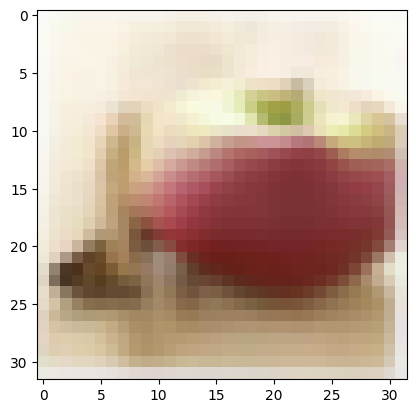

In [ ]:
plt.imshow(x_train[0])

La instancia de la clase ImageDataGenerator de Keras que se utiliza para aplicar técnicas de aumento de datos a las imágenes de entrenamiento.

Se configura con varios parámetros, como rotation_range, width_shift_range y height_shift_range, que especifican las transformaciones de imagen que se aplicarán. Luego, se llama al método fit en la instancia para ajustar la transformación a los datos de entrenamiento.

In [ ]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

## 4. Modelos de red neuronal

### 4.1 Convolucional

Aca se define la arquitectura del modelo de red neuronal convolucional. La red neuronal utiliza una secuencia de capas de convolución, activación y max-pooling para extraer características de las imágenes de entrada. La última capa utiliza una activación softmax para producir una salida de probabilidad para cada una de las clases de interés.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(Activation('elu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('elu'))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 4.2 Compilar modelos NN

Se compila el modelo usando la función de pérdida categorical_crossentropy, el optimizador Adam con una tasa de aprendizaje de 0.0001 y la métrica de evaluación de accuracy (exactitud) para evaluar la precisión del modelo en la clasificación de las imágenes de prueba.

In [ ]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy'])

## 5. Entrenamiento

### 5.1 Modelo convolucional

Se compila el modelo utilizando la función de pérdida "categorical_crossentropy" y el optimizador "Adam".

Se define un objeto "early_stop" que se utilizará para detener el entrenamiento si la función de pérdida en el conjunto de validación no mejora después de un cierto número de épocas.

Finalmente, se ajusta el modelo utilizando los datos de entrenamiento y validación y se guarda el historial del entrenamiento en la variable "history".

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights = True)

# Fit data to model
history = model.fit(datagen.flow(x_train, y_train, batch_size=50), 
                   steps_per_epoch=x_train.shape[0] // 50,
                   epochs=600,
                   validation_data=(x_test, y_test),
                   verbose=1,
                   callbacks=[early_stop])

Epoch 1/600
100/100 [==============================] - 18s 55ms/step - loss: 2.0434 - accuracy: 0.2562 - val_loss: 1.6735 - val_accuracy: 0.4150
Epoch 2/600
100/100 [==============================] - 4s 37ms/step - loss: 1.7223 - accuracy: 0.4054 - val_loss: 1.4792 - val_accuracy: 0.4880
Epoch 3/600
100/100 [==============================] - 4s 35ms/step - loss: 1.5311 - accuracy: 0.4782 - val_loss: 1.3059 - val_accuracy: 0.5660
Epoch 4/600
100/100 [==============================] - 4s 43ms/step - loss: 1.4214 - accuracy: 0.5068 - val_loss: 1.2325 - val_accuracy: 0.5770
Epoch 5/600
100/100 [==============================] - 4s 37ms/step - loss: 1.3175 - accuracy: 0.5494 - val_loss: 1.2227 - val_accuracy: 0.5860
Epoch 6/600
100/100 [==============================] - 4s 36ms/step - loss: 1.2684 - accuracy: 0.5764 - val_loss: 1.1511 - val_accuracy: 0.6030
Epoch 7/600
100/100 [==============================] - 4s 39ms/step - loss: 1.1880 - accuracy: 0.6002 - val_loss: 1.2007 - val_accuracy

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       36992     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 256)       295168    
                                                        

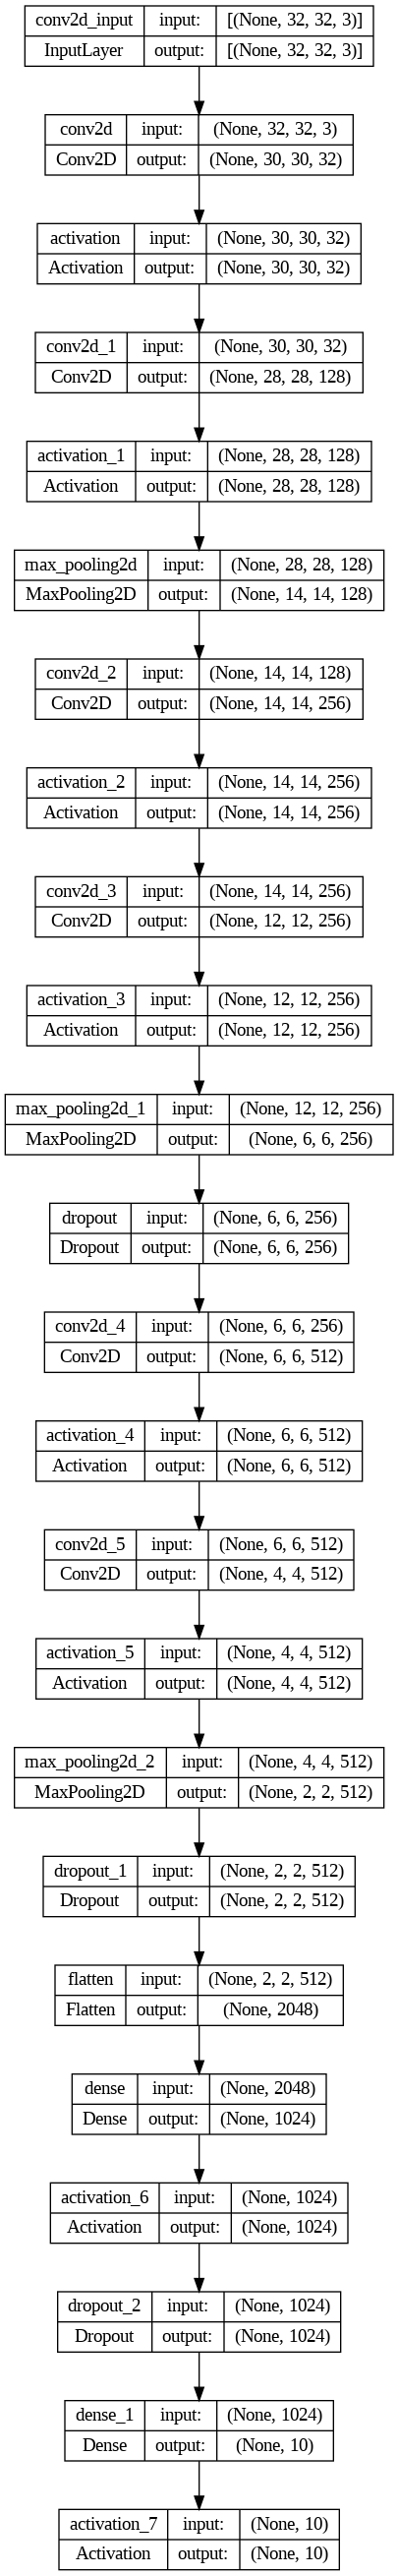

In [ ]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

### 5.3 Graficas de entrenamiento

Estas líneas de código se usan para graficar el historial de pérdida (Loss) y precisión (Accuracy) durante el entrenamiento del modelo.

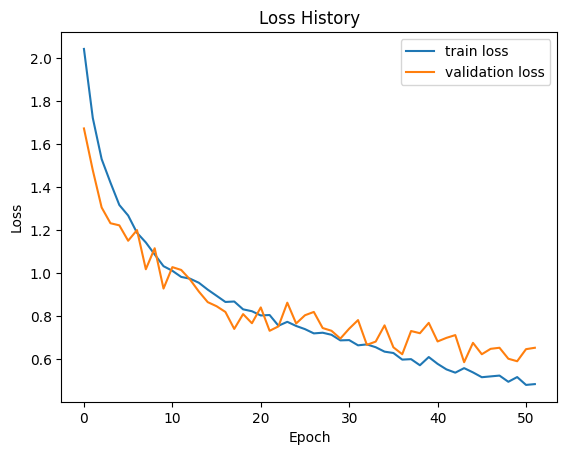

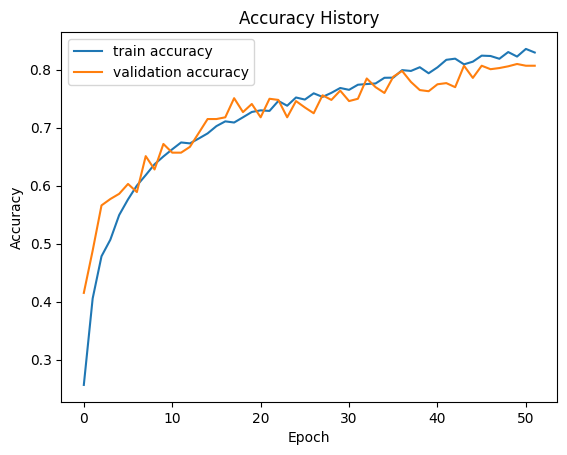

In [ ]:
# Plot the loss history
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='train loss')
ax.plot(history.history['val_loss'], label='validation loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Loss History')
ax.legend()
plt.show()

# Plot the accuracy history
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='train accuracy')
ax.plot(history.history['val_accuracy'], label='validation accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy History')
ax.legend()
plt.show()

## 5. Guardado

In [ ]:
model.save('models/modelo_cnn.h5')

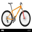

1/1 [==============================] - 0s 32ms/step
Etiqueta predicha: bicycle


In [ ]:
# Montar Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Cargar una imagen desde Google Drive
from PIL import Image

image_path = '/content/descarga (1).jpg'
image = Image.open(image_path)
image = image.resize((32, 32))
image.show()

# Preprocesar la imagen
import numpy as np

x = np.array(image)
x = x.reshape(1, 32, 32, 3)
x = x.astype('float32') / 255

# Realizar la predicción
prediction = model.predict(x)
predicted_label = np.argmax(prediction)


class_names = [
        'apple', # id 0
        'aquarium_fish',
        'baby',
        'bear',
        'beaver',
        'bed',
        'bee',
        'beetle',
        'bicycle',
        'bottle',
        'bowl',
        'boy',
        'bridge',
        'bus',
        'butterfly',
        'camel',
        'can',
        'castle',
        'caterpillar',
        'cattle',
        'chair',
        'chimpanzee',
        'clock',
        'cloud',
        'cockroach',
        'couch',
        'crab',
        'crocodile',
        'cup',
        'dinosaur',
        'dolphin',
        'elephant',
        'flatfish',
        'forest',
        'fox',
        'girl',
        'hamster',
        'house',
        'kangaroo',
        'computer_keyboard',
        'lamp',
        'lawn_mower',
        'leopard',
        'lion',
        'lizard',
        'lobster',
        'man',
        'maple_tree',
        'motorcycle',
        'mountain',
        'mouse',
        'mushroom',
        'oak_tree',
        'orange',
        'orchid',
        'otter',
        'palm_tree',
        'pear',
        'pickup_truck',
        'pine_tree',
        'plain',
        'plate',
        'poppy',
        'porcupine',
        'possum',
        'rabbit',
        'raccoon',
        'ray',
        'road',
        'rocket',
        'rose',
        'sea',
        'seal',
        'shark',
        'shrew',
        'skunk',
        'skyscraper',
        'snail',
        'snake',
        'spider',
        'squirrel',
        'streetcar',
        'sunflower',
        'sweet_pepper',
        'table',
        'tank',
        'telephone',
        'television',
        'tiger',
        'tractor',
        'train',
        'trout',
        'tulip',
        'turtle',
        'wardrobe',
        'whale',
        'willow_tree',
        'wolf',
        'woman',
        'worm',
       
    ]

class_name = class_names[predicted_label]
print('Etiqueta predicha:', class_name)


## 7. Recomendaciones

Los modelos AlexNet, DenseNet, ResNet y VGG19 son modelos de redes neuronales convolucionales (CNN) que se han desarrollado previamente para la tarea de clasificación de imágenes. Cada uno de estos modelos tiene una arquitectura diferente y se han entrenado en conjuntos de datos masivos para aprender características de las imágenes de entrada.

La principal diferencia entre estos modelos y el modelo propio desarrollado anteriormente es la complejidad de la arquitectura y la cantidad de parámetros que tienen. Estos modelos pre-entrenados tienen millones de parámetros y capas más profundas que el modelo anterior. Además, han sido entrenados en grandes conjuntos de datos como ImageNet, que contiene más de 1,2 millones de imágenes, mientras que el conjunto de datos utilizado para entrenar el modelo anterior era mucho más pequeño (Cifar100).

Otra diferencia importante es que los modelos pre-entrenados utilizan técnicas avanzadas de regularización, como el dropout, la normalización por lotes y la regularización L2, para evitar el sobreajuste y mejorar el rendimiento del modelo en datos no vistos. Estas técnicas no se utilizaron en el modelo anterior.

Por un lado, los modelos pre-entrenados tienen una arquitectura muy compleja que puede ser difícil de crear desde cero. Al utilizar un modelo pre-entrenado, podemos aprovechar la experiencia y el conocimiento de los expertos que crearon el modelo.
Al estar pre-entrenados, estos modelos tienen pesos ya ajustados que funcionan bien para muchas tareas. Por lo tanto, los modelos pre-entrenados se pueden utilizar para la transferencia de aprendizaje, lo que significa que podemos utilizar el modelo pre-entrenado como punto de partida para nuestro problema específico, y luego ajustar los pesos para adaptarlos a nuestros datos. Los modelos pre-entrenados suelen tener resultados impresionantes en comparación con los modelos construidos desde cero.

Al construir un modelo propio, tienes un mayor control sobre su arquitectura y puedes personalizarlo para adaptarlo específicamente a tu problema. Si tienes suficientes datos, es posible que puedas entrenar un modelo propio que supere al rendimiento de un modelo pre-entrenado.
Construir un modelo propio te da una mayor comprensión de cómo funciona el modelo y cómo se ajusta a tus datos, lo que puede ser útil para solucionar problemas y depurar errores.


En general, la elección entre utilizar un modelo pre-entrenado y construir un modelo propio dependerá de los recursos disponibles, el tiempo y el conocimiento de la arquitectura del modelo. Si estás trabajando con una gran cantidad de datos y no tienes suficiente tiempo o recursos para construir un modelo propio, utilizar un modelo pre-entrenado es probablemente la mejor opción. Sin embargo, si estás trabajando con un conjunto de datos pequeño y tienes el tiempo y los recursos para construir un modelo propio, puede valer la pena construir uno desde cero para obtener mejores resultados.